In [1]:
# ############################################################

# ## parsing_by_hour ##

# ############################################################

# -- Designed by

#    김상원

# -- Produced by Mar. 31, 2020. (Ver.1.)

# -- Description: xxx

# ============================================================

In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, savefig

In [3]:
df = pd.read_csv("/Users/sangwon/workspace/school/bithumb_analysis/raw_data/2018-05-btc-krw.csv") # csv load

In [4]:
df.dtypes # identifying column type 

timestamp     object
quantity     float64
price          int64
fee            int64
amount         int64
side           int64
dtype: object

In [5]:
## converting timestamp column type 'object' to 'datetime'
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df.dtypes

timestamp    datetime64[ns]
quantity            float64
price                 int64
fee                   int64
amount                int64
side                  int64
dtype: object

In [6]:
## converting timestamp to detailed date column
df['timestamp_year_month_day']       = df['timestamp'].dt.date         # YYYY-MM-DD(문자)
df['timestamp_year']       = df['timestamp'].dt.year         # 연(4자리숫자)
df['timestamp_month']      = df['timestamp'].dt.month        # 월(숫자)
df['timestamp_month_name'] = df['timestamp'].dt.month_name() # 월(문자)

df['timestamp_day']        = df['timestamp'].dt.day          # 일(숫자)
df['timestamp_time']       = df['timestamp'].dt.time         # HH:MM:SS(문자)
df['timestamp_hour']       = df['timestamp'].dt.hour         # 시(숫자)
df['timestamp_minute']     = df['timestamp'].dt.minute       # 분(숫자)
df['timestamp_second']     = df['timestamp'].dt.second       # 초(숫자)

In [7]:
df

,timestamp,quantity,price,fee,amount,side,timestamp_year_month_day,timestamp_year,timestamp_month,timestamp_month_name,timestamp_day,timestamp_time,timestamp_hour,timestamp_minute,timestamp_second
0,2018-05-01 01:06:02,0.8064,10164000,0,-8196250,0,2018-05-01,2018,5,May,1,01:06:02,1,6,2
1,2018-05-01 01:06:16,0.1000,10163000,0,1016300,1,2018-05-01,2018,5,May,1,01:06:16,1,6,16
2,2018-05-01 01:06:20,0.1000,10163000,0,1016300,1,2018-05-01,2018,5,May,1,01:06:20,1,6,20
3,2018-05-01 01:06:24,0.3382,10162000,0,3436788,1,2018-05-01,2018,5,May,1,01:06:24,1,6,24
4,2018-05-01 01:06:28,0.1000,10153000,0,1015300,1,2018-05-01,2018,5,May,1,01:06:28,1,6,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23290,2018-05-31 23:19:25,0.2509,8338000,0,2092004,1,2018-05-31,2018,5,May,31,23:19:25,23,19,25
23291,2018-05-31 23:21:03,0.0390,8342000,0,325338,1,2018-05-31,2018,5,May,31,23:21:03,23,21,3
23292,2018-05-31 23:21:05,0.4258,8342000,0,3552024,1,2018-05-31,2018,5,May,31,23:21:05,23,21,5
23293,2018-05-31 23:21:08,0.1126,8342000,0,939309,1,2018-05-31,2018,5,May,31,23:21:08,23,21,8


In [8]:
## creating 'hour - amount' connection
group_hour_amount = df['amount'].groupby(df['timestamp_hour'])

In [9]:
## 시간별 transaction 수
group_hour_amount.size()

timestamp_hour
0      971
1      908
2      725
3      730
4      613
5      633
6      634
7      900
8      884
9     1154
10    1069
11    1071
12     974
13     903
14    1145
15    1153
16    1036
17    1278
18    1170
19    1073
20    1002
21    1039
22    1154
23    1076
Name: amount, dtype: int64

In [10]:
## 시간별 총 손익량
group_hour_amount.sum()

timestamp_hour
0     -79413997
1     173875215
2     -39978087
3    -117808993
4      59669301
5      39534245
6    -112758300
7      21846653
8     -25585044
9     -12818660
10      5874752
11     46449476
12     53661098
13    -14430791
14    -60337791
15    -19117035
16     90101556
17   -126684182
18    156140256
19    -19681485
20     18692451
21    -71229217
22     -6877096
23     52874981
Name: amount, dtype: int64

In [11]:
## creating 'hour - earning amount' connection
df2 = df.copy()
df2 =df2[df2['amount'] > 0]
group_hour_amount_positive = df2['amount'].groupby(df2['timestamp_hour'])

In [12]:
# 시간별 수익 transaction 수
group_hour_amount_positive.size()

timestamp_hour
0     579
1     581
2     411
3     449
4     386
5     424
6     391
7     558
8     541
9     719
10    697
11    697
12    695
13    597
14    766
15    748
16    697
17    844
18    777
19    693
20    645
21    637
22    677
23    659
Name: amount, dtype: int64

In [13]:
# 시간별 수익량
group_hour_amount_positive.sum()

timestamp_hour
0     1463300539
1     1676335700
2      898897400
3      958598843
4      889184518
5      835980479
6      847805827
7     1333013604
8     1363676696
9     1996072274
10    1675919694
11    1627907735
12    1636828536
13    1745463740
14    1896473031
15    2091785827
16    1728240557
17    1860393159
18    1922605983
19    1688790767
20    1499162545
21    1559209309
22    1824239467
23    1614390286
Name: amount, dtype: int64

In [14]:
## creating 'day - loss amount' connection
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_hour_amount_negative = df3['amount'].groupby(df3['timestamp_hour'])

In [15]:
# 시간별 손해 transaction 수
group_hour_amount_negative.size()

timestamp_hour
0     392
1     327
2     314
3     281
4     227
5     209
6     243
7     342
8     343
9     435
10    372
11    374
12    279
13    306
14    379
15    405
16    339
17    434
18    393
19    380
20    357
21    402
22    477
23    417
Name: amount, dtype: int64

In [16]:
# 시간별 손해량
group_hour_amount_negative.sum()

timestamp_hour
0    -1542714536
1    -1502460485
2     -938875487
3    -1076407836
4     -829515217
5     -796446234
6     -960564127
7    -1311166951
8    -1389261740
9    -2008890934
10   -1670044942
11   -1581458259
12   -1583167438
13   -1759894531
14   -1956810822
15   -2110902862
16   -1638139001
17   -1987077341
18   -1766465727
19   -1708472252
20   -1480470094
21   -1630438526
22   -1831116563
23   -1561515305
Name: amount, dtype: int64

In [17]:
# 시간별 절대값 총합
absolute_negative_sum=group_hour_amount_negative.sum()
absolute_negative_sum = absolute_negative_sum * (-1)
absolute_total_amount=absolute_negative_sum+group_hour_amount_positive.sum()
absolute_total_amount

timestamp_hour
0     3006015075
1     3178796185
2     1837772887
3     2035006679
4     1718699735
5     1632426713
6     1808369954
7     2644180555
8     2752938436
9     4004963208
10    3345964636
11    3209365994
12    3219995974
13    3505358271
14    3853283853
15    4202688689
16    3366379558
17    3847470500
18    3689071710
19    3397263019
20    2979632639
21    3189647835
22    3655356030
23    3175905591
Name: amount, dtype: int64

In [18]:
## 시간별 계산 table 생성
dfs = [group_hour_amount.size(), group_hour_amount.sum(), group_hour_amount_positive.size(), group_hour_amount_positive.sum(), group_hour_amount_negative.size(), group_hour_amount_negative.sum(), absolute_total_amount, absolute_negative_sum]
day_df_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_hour'), dfs)
day_df_final.columns = [ "Hourly transaction", "Hourly income", "Hourly Yield transaction", "Hourly Yield", "Hourly loss transaction", "Hourly loss", "Hourly absolute amount", "Hourly absolute negative amount"]
day_df_final

,Hourly transaction,Hourly income,Hourly Yield transaction,Hourly Yield,Hourly loss transaction,Hourly loss,Hourly absolute amount,Hourly absolute negative amount
timestamp_hour,,,,,,,,
0,971,-79413997,579,1463300539,392,-1542714536,3006015075,1542714536
1,908,173875215,581,1676335700,327,-1502460485,3178796185,1502460485
2,725,-39978087,411,898897400,314,-938875487,1837772887,938875487
3,730,-117808993,449,958598843,281,-1076407836,2035006679,1076407836
4,613,59669301,386,889184518,227,-829515217,1718699735,829515217
5,633,39534245,424,835980479,209,-796446234,1632426713,796446234
6,634,-112758300,391,847805827,243,-960564127,1808369954,960564127
7,900,21846653,558,1333013604,342,-1311166951,2644180555,1311166951
8,884,-25585044,541,1363676696,343,-1389261740,2752938436,1389261740


In [19]:
day_df_final.to_csv("/Users/sangwon/workspace/school/bithumb_analysis/table/hour_result_table.csv", header=True, index=True, encoding = 'utf-8')

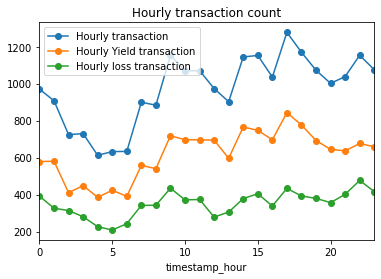

In [23]:
day_df_final[['Hourly transaction', 'Hourly Yield transaction', 'Hourly loss transaction']].plot(title='Hourly transaction count', marker='o')
plt.savefig('/Users/sangwon/workspace/school/bithumb_analysis/graph/Hourly transaction count.png', dpi=300)

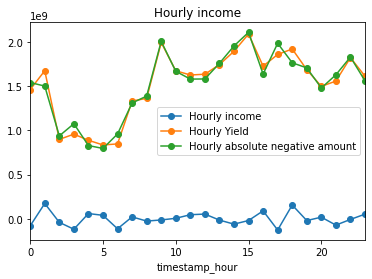

In [25]:
day_df_final[['Hourly income', 'Hourly Yield', 'Hourly absolute negative amount']].plot(title='Hourly income', marker='o')
plt.savefig('/Users/sangwon/workspace/school/bithumb_analysis/graph/Hourly income.png', dpi=300)

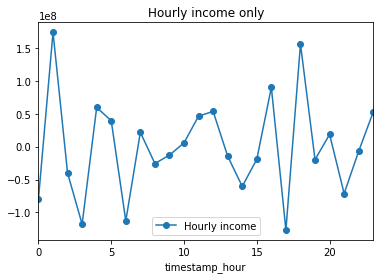

In [26]:
day_df_final[['Hourly income']].plot(title='Hourly income only', marker='o')
plt.savefig('/Users/sangwon/workspace/school/bithumb_analysis/graph/Hourly income only.png', dpi=300)